# Ultimate Ski Trip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_excel("2025 Allianz Datathon Dataset Filtered.xlsx", sheet_name=0)  # first sheet

FileNotFoundError: [Errno 2] No such file or directory: '2025 Allianz Datathon Dataset Filtered.xlsx'

In [ ]:
data2 = pd.read_excel("2025 Allianz Datathon Dataset Filtered.xlsx", sheet_name=1)  # Sheet 2
data3 = pd.read_excel("2025 Allianz Datathon Dataset Filtered.xlsx", sheet_name=2)  # Sheet 3

In [ ]:
data2.info()         # column types, non-null counts
data2.describe()     # summary statistics (numeric columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Year            160 non-null    int64
 1   Week            160 non-null    int64
 2   Mt. Baw Baw     160 non-null    int64
 3   Mt. Stirling    160 non-null    int64
 4   Mt. Hotham      160 non-null    int64
 5   Falls Creek     160 non-null    int64
 6   Mt. Buller      160 non-null    int64
 7   Selwyn          160 non-null    int64
 8   Thredbo         160 non-null    int64
 9   Perisher        160 non-null    int64
 10  Charlotte Pass  160 non-null    int64
dtypes: int64(11)
memory usage: 13.9 KB


,Year,Week,Mt. Baw Baw,Mt. Stirling,Mt. Hotham,Falls Creek,Mt. Buller,Selwyn,Thredbo,Perisher,Charlotte Pass
count,160.000000,160.000000,160.0000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,2018.968750,7.843750,5541.5750,608.418750,20738.781250,24777.993750,30266.462500,5709.550000,30959.037500,40888.562500,2249.993750
std,3.216353,4.300866,3866.2295,527.158736,11848.143399,13732.335937,17254.614074,3288.295639,17849.583317,23579.928253,1297.428523
min,2014.000000,1.000000,0.0000,0.000000,0.000000,1425.000000,0.000000,311.000000,1666.000000,2205.000000,122.000000
25%,2016.000000,4.000000,2091.0000,105.250000,9280.750000,10633.750000,13696.750000,2568.250000,13884.500000,18305.750000,994.250000
50%,2019.000000,8.000000,5688.5000,522.000000,22139.000000,28610.500000,34451.500000,6737.500000,36558.500000,48566.500000,2664.000000
75%,2022.000000,11.250000,8577.5000,977.250000,31054.000000,36771.500000,44510.250000,8534.250000,46183.500000,61058.750000,3362.750000
max,2024.000000,15.000000,18031.0000,2097.000000,44648.000000,49697.000000,66326.000000,12863.000000,70634.000000,93226.000000,5033.000000


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# Weeks & their start dates (you provided)
weeks_2026 = {
    1: "2026-06-09",
    2: "2026-06-16",
    3: "2026-06-23",
    4: "2026-06-30",
    5: "2026-07-07",
    6: "2026-07-14",
    7: "2026-07-21",
    8: "2026-07-28",
    9: "2026-08-04",
    10: "2026-08-11",
    11: "2026-08-18",
    12: "2026-08-25",
    13: "2026-09-01",
    14: "2026-09-08",
    15: "2026-09-15"
}

future_winter = pd.DataFrame({
    "Year": [2026]*15,
    "Week": list(weeks_2026.keys()),
    "Start_Date": list(weeks_2026.values())
})


In [ ]:
# Load sheet 2 (visitor data)
data2 = pd.read_excel("2025 Allianz Datathon Dataset Filtered.xlsx", sheet_name=1)


In [ ]:
RESORT = "Perisher"   # change to any resort

# Features = Year, Week
X = data2[["Year", "Week"]]
y = data2[RESORT]

# Train-test split (last 20% weeks for testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [ ]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=200)
model.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

RMSE for Perisher: 22223.22


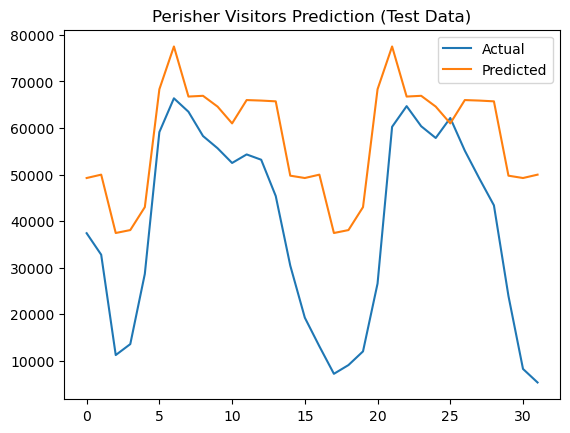

In [ ]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE for {RESORT}: {rmse:.2f}")

plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title(f"{RESORT} Visitors Prediction (Test Data)")
plt.legend()
plt.show()

In [ ]:
resorts = ["Mt. Baw Baw","Mt. Stirling","Mt. Hotham","Falls Creek",
           "Mt. Buller","Selwyn","Thredbo","Perisher","Charlotte Pass"]

forecast_winter = future_winter.copy()

for r in resorts:
    # Prepare data
    X = data2[["Year","Week"]]
    y = data2[r]

    # Train-test split (last 20% as test, no shuffle)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Train model
    model = XGBRegressor(objective="reg:squarederror", n_estimators=200)
    model.fit(X_train, y_train)

    # Predict 2026 winter weeks
    forecast_winter[r] = model.predict(future_winter[["Year","Week"]]).round().astype(int)

forecast_winter.to_excel("2026_winter_forecast.xlsx", index=False)
forecast_winter.head()


,Year,Week,Start_Date,Mt. Baw Baw,Mt. Stirling,Mt. Hotham,Falls Creek,Mt. Buller,Selwyn,Thredbo,Perisher,Charlotte Pass
0,2026,1,2026-06-09,8513,1038,16726,16216,27665,5144,28482,37439,2109
1,2026,2,2026-06-16,6516,711,17273,11829,33328,5403,28805,38068,2110
2,2026,3,2026-06-23,5609,426,17846,21374,36352,5887,32323,42997,2385
3,2026,4,2026-06-30,10614,984,32710,31895,58192,9683,51793,68311,3705
4,2026,5,2026-07-07,11092,1071,39828,36797,65373,10791,58950,77499,4232


In [ ]:
# Show all rows in the DataFrame
print(forecast_winter)

# OR explicitly:
forecast_winter.head(15)    # shows first 15 rows (all your weeks)

# OR in Jupyter, just put the variable on the last line:
forecast_winter

    Year  Week  Start_Date  Mt. Baw Baw  Mt. Stirling  Mt. Hotham  \
0   2026     1  2026-06-09         8513          1038       16726   
1   2026     2  2026-06-16         6516           711       17273   
2   2026     3  2026-06-23         5609           426       17846   
3   2026     4  2026-06-30        10614           984       32710   
4   2026     5  2026-07-07        11092          1071       39828   
5   2026     6  2026-07-14         9082           660       34135   
6   2026     7  2026-07-21         8570          1158       34204   
7   2026     8  2026-07-28         7825          1032       32560   
8   2026     9  2026-08-04         7810           819       34634   
9   2026    10  2026-08-11         6587          1314       37253   
10  2026    11  2026-08-18         7939          1577       34672   
11  2026    12  2026-08-25         6782           975       33389   
12  2026    13  2026-09-01         4750           609       29398   
13  2026    14  2026-09-08        

,Year,Week,Start_Date,Mt. Baw Baw,Mt. Stirling,Mt. Hotham,Falls Creek,Mt. Buller,Selwyn,Thredbo,Perisher,Charlotte Pass
0,2026,1,2026-06-09,8513,1038,16726,16216,27665,5144,28482,37439,2109
1,2026,2,2026-06-16,6516,711,17273,11829,33328,5403,28805,38068,2110
2,2026,3,2026-06-23,5609,426,17846,21374,36352,5887,32323,42997,2385
3,2026,4,2026-06-30,10614,984,32710,31895,58192,9683,51793,68311,3705
4,2026,5,2026-07-07,11092,1071,39828,36797,65373,10791,58950,77499,4232
5,2026,6,2026-07-14,9082,660,34135,40770,49092,9436,50846,66744,3615
6,2026,7,2026-07-21,8570,1158,34204,38308,49630,9266,50463,66904,3723
7,2026,8,2026-07-28,7825,1032,32560,35916,50634,9018,48895,64587,3536
8,2026,9,2026-08-04,7810,819,34634,39378,40367,8602,46293,60980,3441
9,2026,10,2026-08-11,6587,1314,37253,41541,44241,9356,49363,65990,3634


In [ ]:
#Predicting 2026 Ski Season Climate
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import numpy as np

# Load climate data
file_path = '2025 Allianz Datathon Dataset Filtered.xlsx'
df = pd.read_excel(file_path, sheet_name='Climate Data')

# Prepare features
df['Date'] = pd.to_datetime(df[['Year','Month','Day']])
df['DOY'] = df['Date'].dt.dayofyear

stations = df['Bureau of Meteorology station number'].unique()

# Ski week start dates
week_starts = pd.to_datetime([
    '2026-06-09','2026-06-16','2026-06-23','2026-06-30',
    '2026-07-07','2026-07-14','2026-07-21','2026-07-28',
    '2026-08-04','2026-08-11','2026-08-18','2026-08-25',
    '2026-09-01','2026-09-08','2026-09-15'
])

# Generate daily dates for all weeks
all_dates = []
week_labels = []
for i, start in enumerate(week_starts):
    week_range = pd.date_range(start=start, periods=7)
    all_dates.extend(week_range)
    week_labels.extend([f"Week {i+1}"]*7)

# Prediction DataFrame
df_ski = pd.DataFrame({
    'Date': all_dates,
    'Week': week_labels
})
df_ski['Year'] = df_ski['Date'].dt.year
df_ski['Month'] = df_ski['Date'].dt.month
df_ski['Day'] = df_ski['Date'].dt.day
df_ski['DOY'] = df_ski['Date'].dt.dayofyear

all_predictions = []

dry_threshold = 0.5  # consider predicted rainfall <= 0.5 mm as dry for Bluebird

for station in stations:
    df_station = df[df['Bureau of Meteorology station number'] == station].copy()
    df_station = df_station.sort_values('Date')

    # Fill NaNs using DOY mean
    targets_temp = ['Maximum temperature (Degree C)','Minimum temperature (Degree C)']
    target_rain = 'Rainfall amount (millimetres)'
    doy_means = df_station.groupby('DOY')[targets_temp + [target_rain]].mean().reset_index()
    df_station = df_station.merge(doy_means, on='DOY', suffixes=('','_mean'))
    for col in targets_temp + [target_rain]:
        df_station[col] = df_station[col].fillna(df_station[col + '_mean'])
        df_station.drop(columns=[col + '_mean'], inplace=True)
    df_station = df_station.dropna(subset=targets_temp + [target_rain])

    # --- Step 1: Predict temperatures ---
    features_temp = ['Year','Month','Day','DOY']
    X_temp = df_station[features_temp]
    y_temp = df_station[targets_temp]
    model_temp = RandomForestRegressor(n_estimators=100, random_state=42)
    model_temp.fit(X_temp, y_temp)

    df_pred = df_ski.copy()
    df_pred[targets_temp] = model_temp.predict(df_pred[features_temp])
    df_pred['Bureau of Meteorology station number'] = station

    # --- Step 2a: Classifier for dry/wet day ---
    df_station['IsWet'] = (df_station[target_rain] > 0).astype(int)
    features_rain_class = ['Year','Month','Day','DOY']
    X_class = df_station[features_rain_class]
    y_class = df_station['IsWet']
    model_class = RandomForestClassifier(n_estimators=100, random_state=42)
    model_class.fit(X_class, y_class)

    # --- Step 2b: Regressor for wet days only ---
    df_wet = df_station[df_station[target_rain] > 0]
    X_reg = df_wet[features_rain_class]
    y_reg = df_wet[target_rain]
    model_reg = RandomForestRegressor(n_estimators=100, random_state=42)
    model_reg.fit(X_reg, y_reg)

    # Predict rainfall for ski week
    X_pred = df_pred[features_rain_class]
    is_wet_pred = model_class.predict(X_pred)
    rain_pred = np.zeros(len(df_pred))
    # Predict only for wet days
    wet_indices = np.where(is_wet_pred == 1)[0]
    if len(wet_indices) > 0:
        rain_pred[wet_indices] = model_reg.predict(X_pred.iloc[wet_indices])
    df_pred[target_rain] = rain_pred

    # --- Compute lagged rainfall for Bluebird ---
    df_pred['Rainfall_lag1'] = df_pred[target_rain].shift(1).fillna(0)
    df_pred['Rainfall_lag2'] = df_pred[target_rain].shift(2).fillna(0)

    # --- Adjusted Bluebird formula ---
    df_pred['Bluebird'] = (
        ((df_pred['Rainfall_lag1'] > 2) | (df_pred['Rainfall_lag2'] > 2)) &
        (df_pred[target_rain] <= dry_threshold) &
        (df_pred['Maximum temperature (Degree C)'] < 5)
    ).astype(int)

    all_predictions.append(df_pred)

# Combine stations
predictions_2026 = pd.concat(all_predictions, ignore_index=True)

# Export CSV
output_file = 'ski_week_daily_predictions_2026_two_step.csv'
predictions_2026.to_csv(output_file, index=False)
print(f"Predictions exported to {output_file}")


Predictions exported to ski_week_daily_predictions_2026_two_step.csv


In [ ]:
#Grouping BlueBird Data by Resort

# Load daily predictions
pred_file = 'ski_week_daily_predictions_2026_two_step.csv'
df_pred = pd.read_csv(pred_file)

# Updated resort mapping
station_to_resorts = {
    85291: ['Mt. Baw Baw'],
    83024: ['Mt. Stirling', 'Mt. Buller'],
    83085: ['Mt. Hotham'],
    83084: ['Falls Creek'],
    72161: ['Selwyn'],
    71032: ['Thredbo'],
    71075: ['Perisher', 'Charlotte Pass']
}

# Expand DataFrame for resorts sharing same station
rows = []
for idx, row in df_pred.iterrows():
    station = row['Bureau of Meteorology station number']
    resorts = station_to_resorts.get(station, [])
    for resort in resorts:
        new_row = row.copy()
        new_row['Resort'] = resort
        rows.append(new_row)

df_expanded = pd.DataFrame(rows)

# Group by Week and Resort, sum Bluebird days
bluebird_summary = df_expanded.groupby(['Week', 'Resort'])['Bluebird'].sum().reset_index()

# Pivot table: Weeks as rows, Resorts as columns
bluebird_pivot = bluebird_summary.pivot(index='Week', columns='Resort', values='Bluebird').fillna(0).astype(int)

# Optional: order Weeks 1–15
week_order = [f"Week {i}" for i in range(1,16)]
bluebird_pivot = bluebird_pivot.reindex(week_order, fill_value=0)

# Add Total row
total_row = pd.DataFrame(bluebird_pivot.sum()).T
total_row.index = ['Total Bluebird Days']
bluebird_pivot = pd.concat([bluebird_pivot, total_row])

# Export to Excel
output_excel = 'bluebird_summary_weeks.xlsx'
with pd.ExcelWriter(output_excel) as writer:
    bluebird_pivot.to_excel(writer, sheet_name='Bluebird Summary')

print(f"Bluebird summary with total row exported to {output_excel}")


Bluebird summary with total row exported to bluebird_summary_weeks.xlsx


In [ ]:
#Trip Score Ranking

import pandas as pd

file_path = "Resort Price.xlsx"

# Terrain difficulty levels per resort
terrain_levels = {
    "Mt. Baw Baw": 1,
    "Mt. Stirling": 1,
    "Mt. Hotham": 3,
    "Falls Creek": 2,
    "Mt. Buller": 4,
    "Selwyn": 1,
    "Thredbo": 3,
    "Perisher": 4,
    "Charlotte Pass": 2
}

# Read Sheets
bluebird_df = pd.read_excel(file_path, sheet_name="BluebirdDays")
capacity_df = pd.read_excel(file_path, sheet_name="CapacityAssessment")
pricing_df = pd.read_excel(file_path, sheet_name="TotalPricing")

print("Sheets loaded:")
print(bluebird_df.head())
print(capacity_df.head())
print(pricing_df.head())

# Convert To Long Format
bluebird_long = bluebird_df.melt(id_vars="Week", var_name="Resort", value_name="BluebirdDays")
capacity_long = capacity_df.melt(id_vars="Week", var_name="Resort", value_name="CapacityPct")
pricing_long = pricing_df.melt(id_vars="Week", var_name="Resort", value_name="TotalCost")

# Merge Sheets
df = bluebird_long.merge(capacity_long, on=["Week", "Resort"])
df = df.merge(pricing_long, on=["Week", "Resort"])

print("Merged dataframe preview:")
print(df.head())

# Normalize Values
df["BluebirdNorm"] = df["BluebirdDays"] / df["BluebirdDays"].max()
df["CapacityNorm"] = 1 - (df["CapacityPct"] / df["CapacityPct"].max())  # Lower capacity % = better
df["CostNorm"] = 1 - (df["TotalCost"] / df["TotalCost"].max())

# Add Terrain Variable
df['TerrainLevel'] = df['Resort'].map(terrain_levels)
df['TerrainNorm'] = df['TerrainLevel'] / df['TerrainLevel'].max()  # Higher terrain = better

# Weighted Tripscore
# Equal weights: Bluebird, Capacity, Cost, Terrain
alpha, beta, gamma, delta = 0.25, 0.25, 0.25, 0.25
df["TripScore"] = (alpha * df["BluebirdNorm"] +
                   beta * df["CapacityNorm"] +
                   gamma * df["CostNorm"] +
                   delta * df["TerrainNorm"])

# Penalize Mt Stirling for only being cross-country skiing
penalty_factor = 0.2  # 20% of original TripScore
df.loc[df['Resort'] == "Mt. Stirling", "TripScore"] *= penalty_factor

# Rank Trips
df["TripRankPerResort"] = df.groupby("Resort")["TripScore"].rank(ascending=False, method="first")
df["TripRankOverall"] = df["TripScore"].rank(ascending=False, method="first")

# Sort by Rank
df = df.sort_values(by="TripRankOverall").reset_index(drop=True)

print("Final dataframe preview:")
print(df.head())

# Save to Excel
output_file = "TripScore_AllResorts2026.xlsx"
df.to_excel(output_file, index=False)
print(f"TripScore calculation complete! Output saved to '{output_file}'.")


Sheets loaded:
  Week  Mt. Baw Baw  Mt. Stirling  Mt. Hotham  Falls Creek  Mt. Buller  \
0    1            2             2           1            2           2   
1    2            0             0           1            0           0   
2    3            2             2           3            1           2   
3    4            0             2           1            2           2   
4    5            1             2           2            1           2   

   Selwyn  Thredbo  Perisher  Charlotte Pass  
0       2        1         2               2  
1       0        1         0               0  
2       2        3         1               1  
3       0        2         0               0  
4       2        2         2               2  
  Week Mt. Baw Baw Mt. Stirling  Mt. Hotham  Falls Creek  Mt. Buller  \
0    1    6.755033     2.575107   11.910948    14.753406   15.336369   
1    2   13.632078     3.910348   18.457714    14.143711   18.691011   
2    3   39.537463    20.123987   41.54497